## Building a dataset to look at how change in democratic institutions is correlated with change in conflict

Proxy for democratic institutions: 3 year moving average of Polity4 for each country

Proxy for conflict: 3 year moving average of the maximum intensity (1 or 2) of the conflict in that year in that country from UCDP/PRIO armed conflict dataset

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

### First prepare the polity 4 data

In [2]:
polityIVAll = pd.read_excel('p4v2015.xls')

In [3]:
polityIVAll = polityIVAll[polityIVAll['year'] >= 1945]

In [4]:
polityIVAll.head()

,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,...,interim,bmonth,bday,byear,bprec,post,change,d4,sf,regtrans
145,7001945,700,AFG,Afghanistan,1945,0,NaN,0,10,-10,...,NaN,7.0,1.0,1945.0,4.0,-10.0,-2.0,1.0,NaN,0.0
146,7001946,700,AFG,Afghanistan,1946,0,NaN,0,10,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,7001947,700,AFG,Afghanistan,1947,0,NaN,0,10,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,7001948,700,AFG,Afghanistan,1948,0,NaN,0,10,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,7001949,700,AFG,Afghanistan,1949,0,NaN,0,10,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
polityIV = polityIVAll[['cyear','ccode','scode','country','year','polity']]


In [6]:
polityIV = polityIV[(polityIV['polity'] <= 10) & (polityIV['polity'] >= -10)]

In [7]:
# Calculate moving average and difference - prelimiaries

polityIV.ix[:,'polity_moving_avg'] = 0
polityIV.ix[:,'delta_polity_moving_avg'] = np.nan

all_countries = polityIV['country'].unique()

In [8]:
# Calculate moving average - main loop

for c in all_countries:
    polityIV.loc[polityIV['country']==c,'polity_moving_avg'] = \
        polityIV.loc[polityIV['country']==c,'polity'].rolling(window=3, center=True).mean()
    polityIV.loc[polityIV['country']==c,'delta_polity_moving_avg'] = \
        polityIV.loc[polityIV['country']==c,'polity_moving_avg'].diff()
    

In [9]:
polityIV['ccode'] = polityIV['ccode'].astype(str)

In [10]:
polityIV[polityIV['country']=='Indonesia']


,cyear,ccode,scode,country,year,polity,polity_moving_avg,delta_polity_moving_avg
6821,8501945,850,INS,Indonesia,1945,-5,NaN,NaN
6822,8501946,850,INS,Indonesia,1946,2,-0.333333,NaN
6823,8501947,850,INS,Indonesia,1947,2,2.333333,2.666667
6824,8501948,850,INS,Indonesia,1948,3,2.666667,0.333333
6825,8501949,850,INS,Indonesia,1949,3,2.000000,-0.666667
6826,8501950,850,INS,Indonesia,1950,0,1.000000,-1.000000
6827,8501951,850,INS,Indonesia,1951,0,0.000000,-1.000000
6828,8501952,850,INS,Indonesia,1952,0,0.000000,0.000000
6829,8501953,850,INS,Indonesia,1953,0,0.000000,0.000000
6830,8501954,850,INS,Indonesia,1954,0,0.000000,0.000000


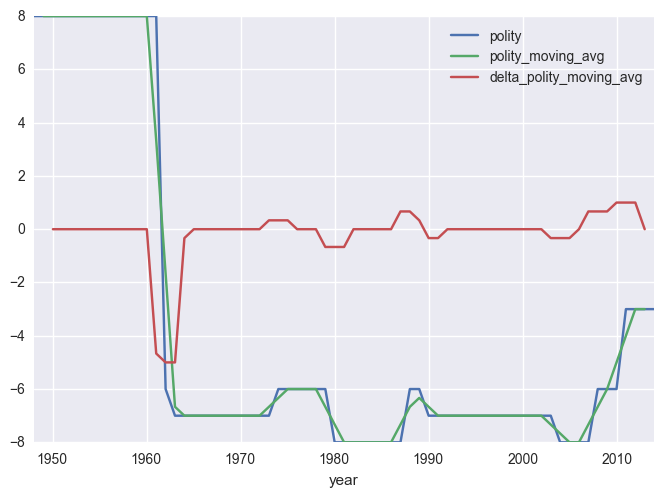

In [11]:
plt.figure(); polityIV.loc[polityIV['country']=='Myanmar (Burma)',['year','polity','polity_moving_avg','delta_polity_moving_avg']] \
    .plot(x='year',y=['polity','polity_moving_avg','delta_polity_moving_avg']);

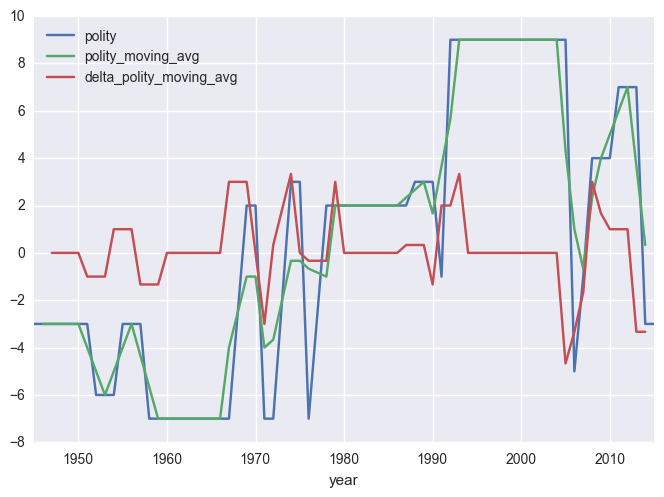

In [12]:
plt.figure(); polityIV.loc[polityIV['country']=='Thailand',['year','polity','polity_moving_avg','delta_polity_moving_avg']] \
    .plot(x='year',y=['polity','polity_moving_avg','delta_polity_moving_avg']);

### Now prepare the conflict data

In [13]:
conflictAll = pd.read_csv('ucdp-prio-acd-4-2016.csv')

In [14]:
conflict = conflictAll[['Location','SideA','SideA2nd','SideBID','Year','IntensityLevel','TypeOfConflict','GWNoA']]
conflict = conflict[conflict['TypeOfConflict'] >= 3]

In [15]:
conflict[conflict['Location']=='Indonesia']

,Location,SideA,SideA2nd,SideBID,Year,IntensityLevel,TypeOfConflict,GWNoA
878,Indonesia,Government of Indonesia,NaN,1056,1950,2,3,850
879,Indonesia,Government of Indonesia,NaN,1059,1953,2,3,850
880,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",1958,2,3,850
881,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",1959,2,3,850
882,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",1960,1,3,850
883,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",1961,2,3,850
884,Indonesia,Government of Indonesia,NaN,1108,1965,1,3,850
885,Indonesia,Government of Indonesia,NaN,1108,1967,1,3,850
886,Indonesia,Government of Indonesia,NaN,1108,1968,1,3,850
887,Indonesia,Government of Indonesia,NaN,1108,1969,1,3,850


In [16]:
conflictGrouped = conflict.groupby(['GWNoA','Year'],sort=True).max()
conflictGrouped = conflictGrouped.reset_index()
conflictGrouped.rename(columns={'GWNoA': 'ccode', 'Year': 'year'}, inplace=True)

In [17]:
conflictGrouped[conflictGrouped['Location']=='Indonesia']

,ccode,year,Location,SideA,SideA2nd,SideBID,IntensityLevel,TypeOfConflict
1354,850,1950,Indonesia,Government of Indonesia,NaN,1056,2,3
1355,850,1953,Indonesia,Government of Indonesia,NaN,1059,2,3
1356,850,1958,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",2,3
1357,850,1959,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",2,3
1358,850,1960,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",1,3
1359,850,1961,Indonesia,Government of Indonesia,NaN,"1059, 1060, 1061",2,3
1360,850,1965,Indonesia,Government of Indonesia,NaN,1108,1,3
1361,850,1967,Indonesia,Government of Indonesia,NaN,1108,1,3
1362,850,1968,Indonesia,Government of Indonesia,NaN,1108,1,3
1363,850,1969,Indonesia,Government of Indonesia,NaN,1108,1,3


### Merge the two datasets

In [18]:
merged = pd.merge(polityIV, conflictGrouped,  how='left', on=['ccode','year'])

In [19]:
merged['IntensityLevel'] = merged['IntensityLevel'].fillna(0)
merged['intensity_moving_avg'] = 0
merged['delta_intensity_moving_avg'] = 0

In [20]:
for c in all_countries:
    merged.loc[merged['country']==c,'intensity_moving_avg'] = \
        merged.loc[merged['country']==c,'IntensityLevel'].rolling(window=3, center=True).mean()
    merged.loc[merged['country']==c,'delta_intensity_moving_avg'] = \
        merged.loc[merged['country']==c,'intensity_moving_avg'].diff()

In [21]:
merged[merged['country'] == 'Indonesia'].head(10)

,cyear,ccode,scode,country,year,polity,polity_moving_avg,delta_polity_moving_avg,Location,SideA,SideA2nd,SideBID,IntensityLevel,TypeOfConflict,intensity_moving_avg,delta_intensity_moving_avg
3566,8501945,850,INS,Indonesia,1945,-5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3567,8501946,850,INS,Indonesia,1946,2,-0.333333,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN
3568,8501947,850,INS,Indonesia,1947,2,2.333333,2.666667,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.000000
3569,8501948,850,INS,Indonesia,1948,3,2.666667,0.333333,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.000000
3570,8501949,850,INS,Indonesia,1949,3,2.000000,-0.666667,NaN,NaN,NaN,NaN,0.0,NaN,0.666667,0.666667
3571,8501950,850,INS,Indonesia,1950,0,1.000000,-1.000000,Indonesia,Government of Indonesia,NaN,1056,2.0,3.0,0.666667,0.000000
3572,8501951,850,INS,Indonesia,1951,0,0.000000,-1.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.666667,0.000000
3573,8501952,850,INS,Indonesia,1952,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.666667,0.000000
3574,8501953,850,INS,Indonesia,1953,0,0.000000,0.000000,Indonesia,Government of Indonesia,NaN,1059,2.0,3.0,0.666667,0.000000
3575,8501954,850,INS,Indonesia,1954,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.666667,0.000000


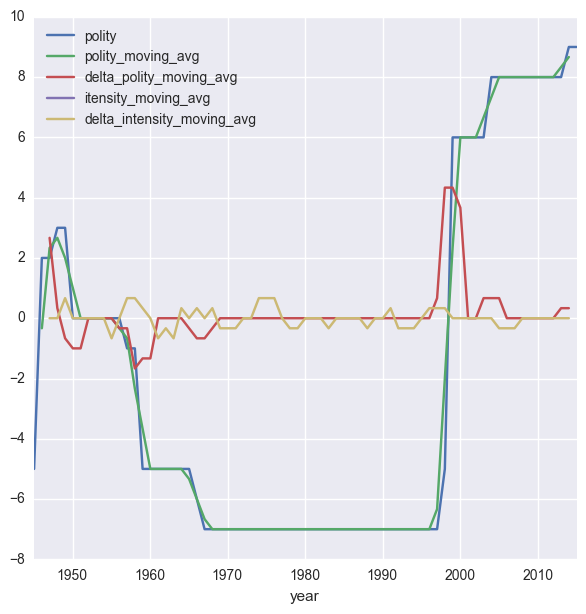

In [22]:
plt.figure(); merged.loc[merged['country']=='Indonesia',['year','polity','polity_moving_avg',\
                                                             'delta_polity_moving_avg','itensity_moving_avg',\
                                                             'delta_intensity_moving_avg']] \
    .plot(x='year',y=['polity','polity_moving_avg','delta_polity_moving_avg',\
                      'itensity_moving_avg','delta_intensity_moving_avg'],figsize=(7,7));

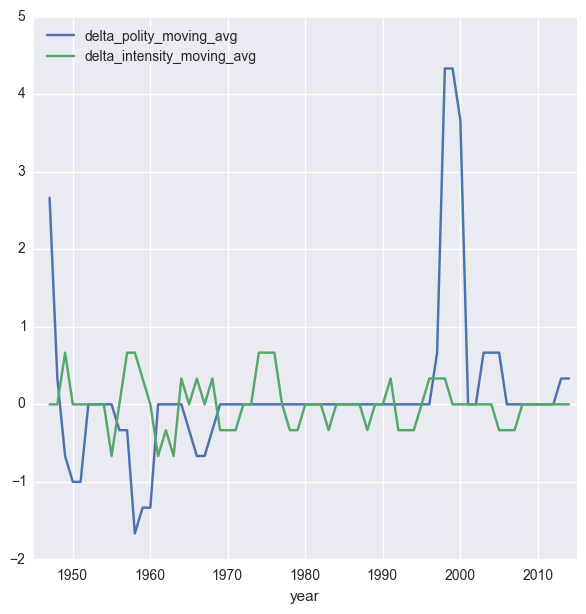

In [23]:
plt.figure(); merged.loc[merged['country']=='Indonesia',['year','delta_polity_moving_avg','delta_intensity_moving_avg']] \
    .plot(x='year',y=['delta_polity_moving_avg','delta_intensity_moving_avg'],figsize=(7,7));

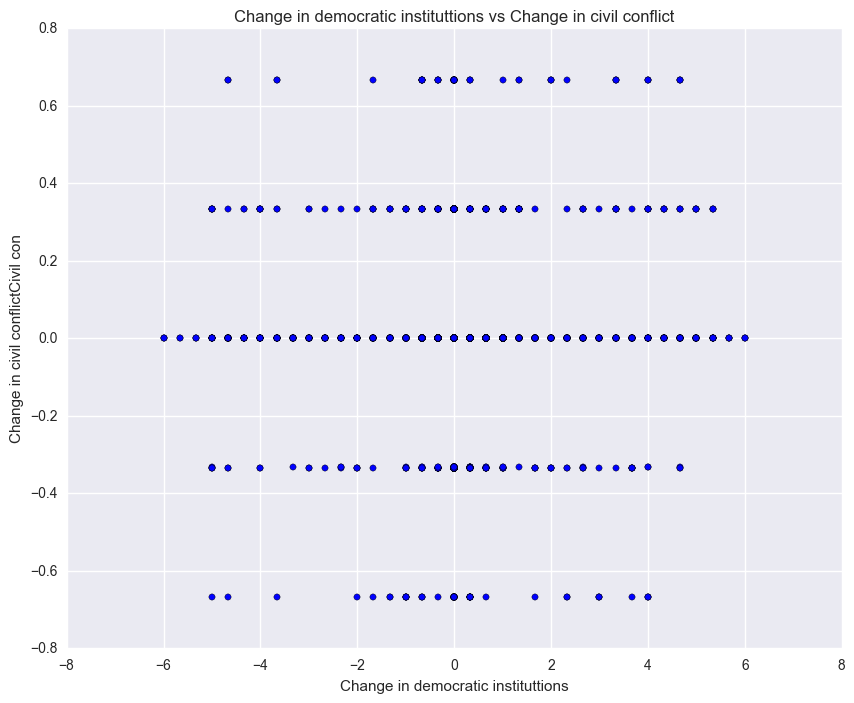

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(merged['delta_polity_moving_avg'],merged['delta_intensity_moving_avg'])

# Chart title
plt.title('Change in democratic instituttions vs Change in civil conflict')

# y label
plt.ylabel('Change in civil conflict')

# x label
plt.xlabel('Change in democratic instituttions')

In [52]:
heatplot_data = merged[['delta_polity_moving_avg','delta_intensity_moving_avg']].fillna(0)
heatplot_data = heatplot_data[(heatplot_data['delta_polity_moving_avg'] != 0) | \
                              (heatplot_data['delta_intensity_moving_avg'] != 0)]
heatplot_data = heatplot_data.round(2)
#sns.heatmap([heatplot_data['delta_polity_moving_avg'],heatplot_data['delta_intensity_moving_avg']], annot=True, fmt='f')


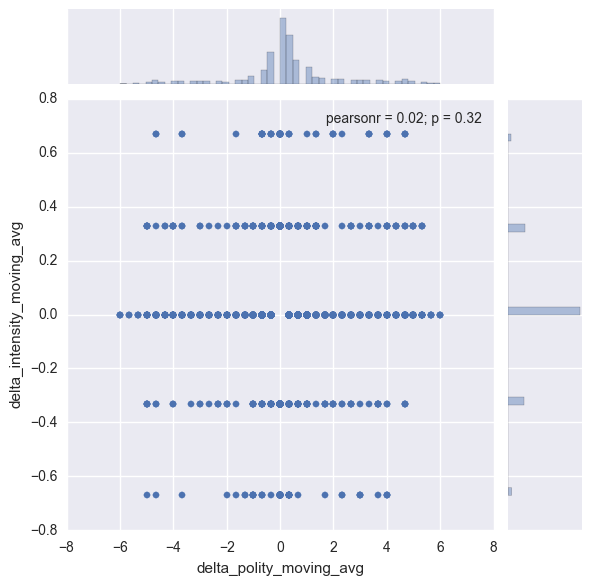

In [53]:
sns.jointplot('delta_polity_moving_avg','delta_intensity_moving_avg',data=heatplot_data)

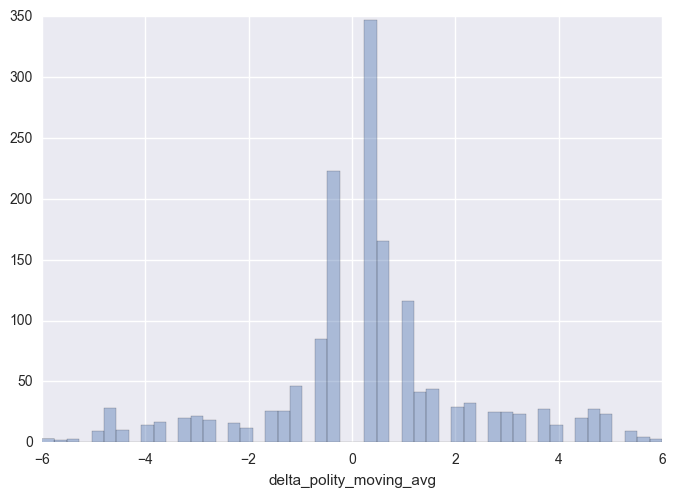

In [65]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(heatplot_data[heatplot_data['delta_intensity_moving_avg']==0]['delta_polity_moving_avg'],kde=False)


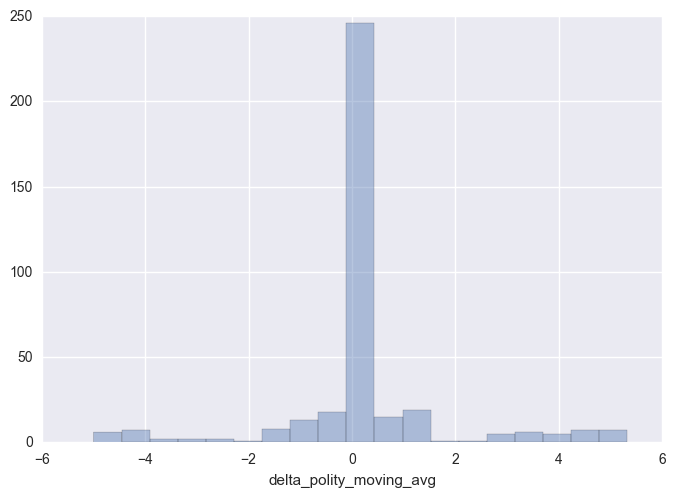

In [66]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']>0.2) & \
                          (heatplot_data['delta_intensity_moving_avg']<0.6)]['delta_polity_moving_avg'],kde=False)


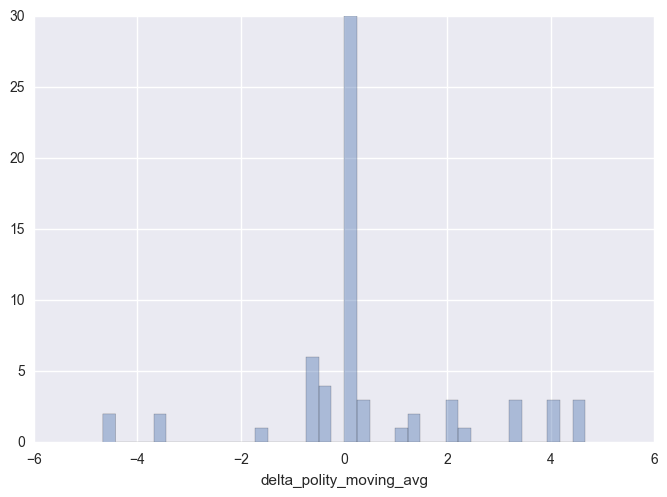

In [67]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']>0.6)]['delta_polity_moving_avg'],kde=False)

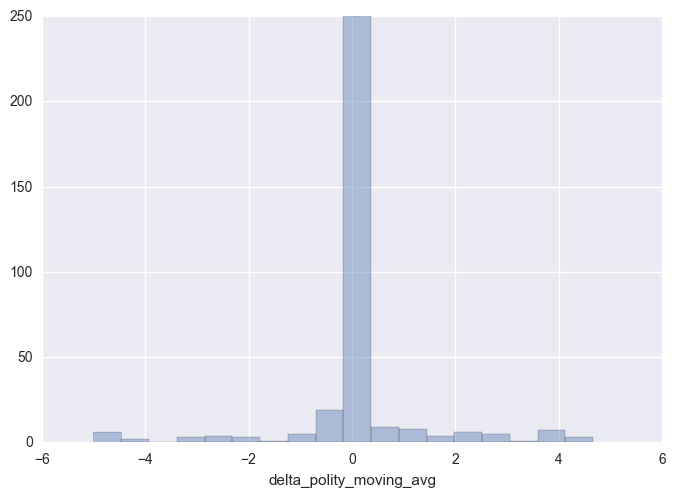

In [68]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']<-0.2) & \
                          (heatplot_data['delta_intensity_moving_avg']>-0.6)]['delta_polity_moving_avg'],kde=False)

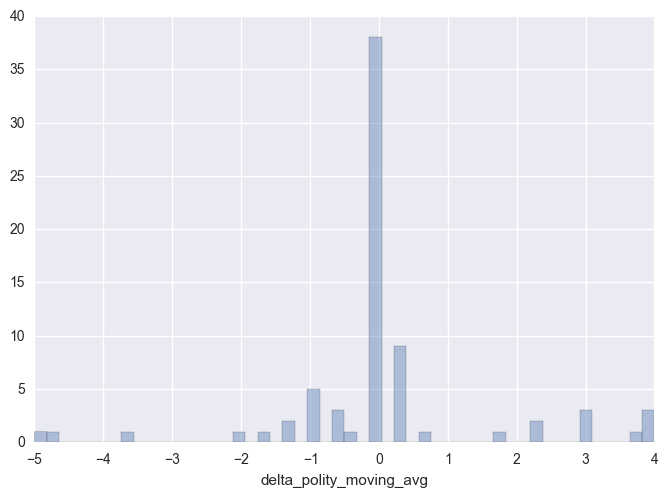

In [69]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']<-0.6)]['delta_polity_moving_avg'],kde=False)